## Discretizing 2D Laplace's Equation with Finite Difference

$$ \left(\frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}\right)= 0$$ 
Using the finite differences method to discretize the 2D Laplace's Equation using the five-point stencil method.

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

From the **finite differences method**
$$\frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2} \approx \frac{u_{(i+1),j}-2u_{i,j} +u_{(i-1),j}}{\Delta x^2} + \frac{u_{i,(j+1)}-2u_{i,j} +u_{i,(j-1)}}{\Delta y^2}.$$
Therefore
$$ \left(\frac{u_{(i+1),j}-2u_{i,j} +u_{(i-1),j}}{\Delta x^2} + \frac{u_{i,(j+1)}-2u_{i,j} +u_{i,(j-1)}}{\Delta y^2}\right) =0.$$ 

Assuming a uniform spatial discretization , $\Delta x^2 = \Delta y^2$. Thus
$$ \frac{1}{\Delta x^2} \left(u_{(i+1),j}+u_{(i-1),j}-4u_{i,j} +u_{i,(j+1)} +u_{i,(j-1)}\right) =f_{i,j}.$$ 
<br>
As a result, the following linear system is produced
$$Au = f.$$

The **five-point stencil method** involves the division of a 2-dimensional region into a series of smaller regions. These smaller regions are comprised of increments $\Delta x$ and $\Delta y$. Each point has a corresponding $i$ and $j$ value which denotes their increments in the $x$ and $y$ direction, respectively.

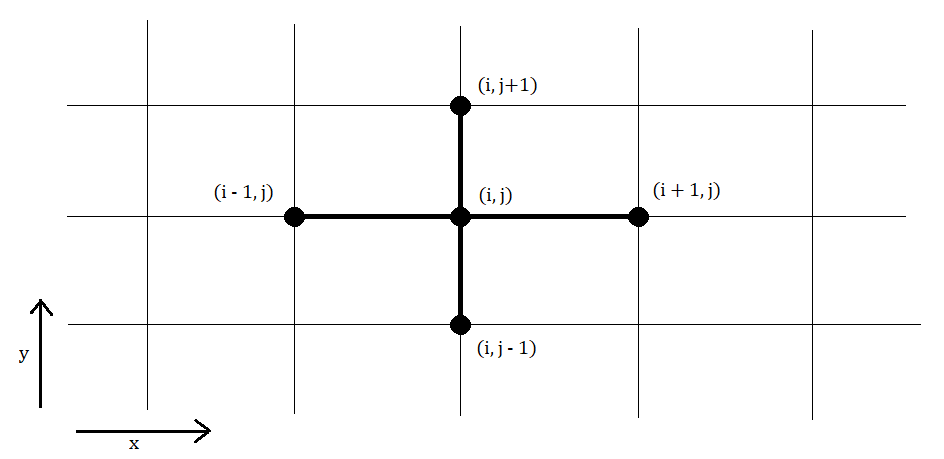
Figure 1: 5-point stencil method for discretizing Laplace's Equation

**Consider** a rectangular surface $(0\le x \le 1, 0\le y \le 1)$  with uniform temperature boundary conditions (top surface holds at $25^\circ$C with all other surfaces maintaining $0^\circ$C). Figure 2 is a visualization of this surface.


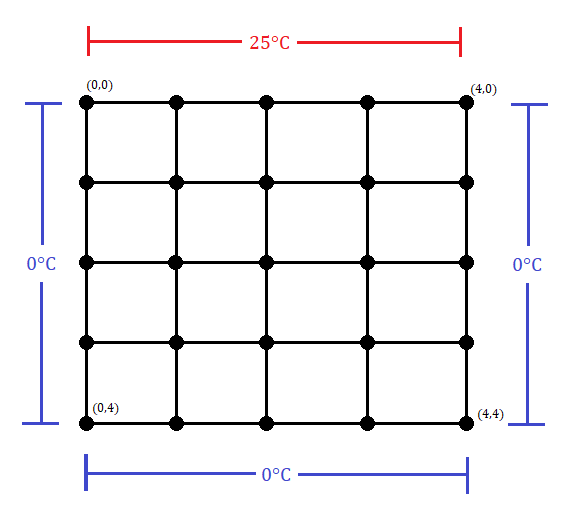
Figure 2: Rectangular Surface with Temperature Boundary Conditions

To solve for the temperatures at the nine interior points of the grid, we create a system of linear equations where each equation represents a single instance of the 5-point stencil method. 

$$
    T_{2,1}+ 0 - 4T_{1,1} + 25 + T_{1,2} = 0
$$
$$
    T_{3,1}+ T_{1,1} - 4T_{2,1} + 25 + T_{2,2} = 0
$$
$$
    0 + T_{2,1} - 4T_{3,1} + 25 + T_{3,2} = 0
$$
$$
    T_{2,2}+ 0 - 4T_{1,2} + T_{1,1} + T_{1,3} = 0
$$
$$
    T_{3,2}+ T_{1,2} - 4T_{2,2} + T_{2,1} + T_{2,3} = 0
$$
$$
    0 + T_{2,2} - 4T_{3,2} + T_{3,1} + T_{3,3} = 0
$$
$$
    T_{2,3}+ 0 - 4T_{1,3} + T_{1,2} + 0 = 0
$$
$$
    T_{3,3}+ T_{1,3} - 4T_{2,3} + T_{2,2} + 0 = 0
$$
$$
    0 + T_{2,3} - 4T_{3,3} + T_{3,2} + 0 = 0
$$

Rearranging the equations into the form $Au = f$:
$$
\begin{bmatrix}
-4 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & -4 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & -4 & 0 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 0 & -4 & 1 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 1 & -4 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & -4 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 1 & -4 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & -4
\end{bmatrix}
\begin{bmatrix}
T_{1,1}\\
T_{2,1}\\
T_{3,1}\\
T_{1,2}\\
T_{2,2}\\
T_{3,2}\\
T_{1,3}\\
T_{2,3}\\
T_{3,3}
\end{bmatrix} =
\begin{bmatrix}
-25\\
-25\\
-25\\
0\\
0\\
0\\
0\\
0\\
0
\end{bmatrix}
$$

In [3]:
# N = M - 2
# where N is the number of points in interior of the grid 
# (also equates to the number of linear equations in the system), 
# and M is the dimension of the boundary points in the grid

N = 1024
matrix = np.zeros((N,N), dtype=float, order='C') 

In [4]:
#Top Surface Temperatrue
T = 25


In [5]:
b = np.zeros((N,1), dtype=float, order='C')
for i in range(int(np.sqrt(N))):
    b[i] = -T

In [6]:
#Boundary Conditions
for i in range(len(matrix)): 
    matrix[i,i] = -4
    
for i in range(1, len(matrix)):
    matrix[i,i-1] = 1

for i in range(int(np.sqrt(N)), len(matrix)):
    matrix[i,i-int(np.sqrt(N))] = 1
    
for i in range(len(matrix)-1):
    matrix[i,i+1] = 1    

for i in range(len(matrix)-int(np.sqrt(N))):
    matrix[i,i+int(np.sqrt(N))] = 1


In [7]:
for i in range(1, int(np.sqrt(N))):
    matrix[i*int(np.sqrt(N))-1, i*int(np.sqrt(N))] = 0
    matrix[i*int(np.sqrt(N)), i*int(np.sqrt(N))-1] = 0

In [8]:
sol = np.linalg.solve(matrix, b)


In [9]:
a = np.zeros((int(np.sqrt(N)),int(np.sqrt(N))), dtype=float, order='C') 


In [10]:
n = int(np.sqrt(N))

for i in range(n):
    for j in range(n):
        a[i,j] = sol[j+n*i]

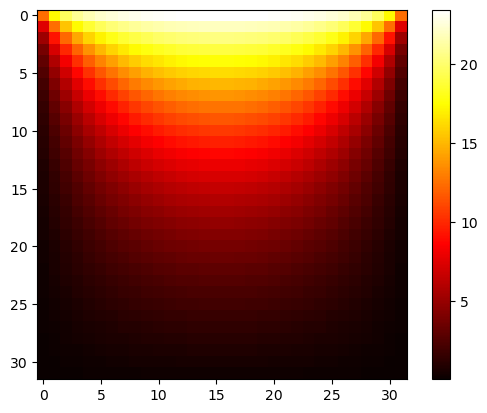

In [11]:
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()